# Lab 3: Non-parametric Classifiers
Machine Learning 2019/2020 <br>
Ruben Wiersma and Gosia Migut

**WHAT** This nonmandatory lab consists of several programming and insight exercises/questions on k-nn density estimation.

**WHY** The exercises are meant to familiarize yourself with the basic concepts of non-parametric classifiers.

**HOW** Follow the exercises in this notebook either on your own or with a friend. If you want to skip right to questions and exercises, find the $\rightarrow$ symbol. Use [Mattermost][1] to discuss questions with your peers. For additional questions and feedback please consult the TA's during the lab session. 

[1]: https://mattermost.ewi.tudelft.nl/ml/channels/qa-week-3
$\newcommand{\q}[1]{\rightarrow \textbf{Question #1}}$
$\newcommand{\ex}[1]{\rightarrow \textbf{Exercise #1}}$

## K-Nearest Neighbours

Last week, you got acquainted with parametric classifiers. You described a distribution using only a few parameters (mean and standard deviation) and tried to find the values for those parameters that best fit the data. This week, you will work on non-parametric classifiers. As the name implies, these classifiers do not use parameters to describe their data. Instead, they directly use training data in the classification process, or set up rules to classify new samples.

A popular example of non-parametric classifiers is the K-Nearest Neighbours (K-NN) classifier. In this exercise, you will find out how it works by implementing it yourself and you'll get to know in what circumstances to use it. In this assignment, we will walk you through the following steps in the K-NN algorithm:

1. Load data: Open the dataset from CSV and split into test/train datasets.
2. Similarity: Calculate the distance between two data instances.
3. Nearest Neighbors: Locate k most similar data instances.
4. Majority vote: Get the neighbours to vote on the class of the test points.
5. Accuracy: Summarize the accuracy of predictions.

Let's get started!

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Load data
In this notebook we will work with the Iris dataset.
First we import all the modules that you need for this exercise:

In [2]:
from sklearn import datasets # to load the dataset
from sklearn.model_selection import train_test_split #to split in train and test set
from sklearn.model_selection import cross_val_score #BONUS
from sklearn.metrics import classification_report, accuracy_score
from scipy.spatial import distance
import numpy as np

Next, we load the dataset:

In [3]:
# load the data and create the training and test sets
iris = datasets.load_iris()
# X is the feature vectors for the data points, and y is the target (ground truth) class for those data points 
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4) 

$\ex{1.1}$ Print and plot the data to understand what you will be classifying. You can plot points using Matplotlib's [scatter](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) function. We have already imported `pyplot` as `plt`. This means you can call the `scatter` function with `plt.scatter(x, y, ...)`.

__Hint__ each sample has four features, you can just plot two of them to get a basic idea of the data.<br>
__Hint__ use the `c=y_train` parameter to colour each point with its class.

Text(0, 0.5, 'Sepal width (second feature)')

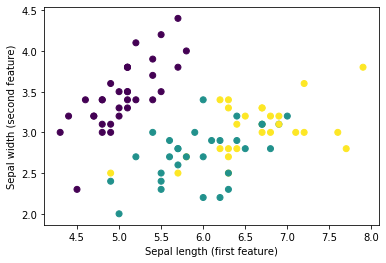

In [4]:
from matplotlib import pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel('Sepal length (first feature)')
plt.ylabel('Sepal width (second feature)')

$\q{1.1}$ Would it work to classify this dataset with a parametric classifier? Why? Why not?

### 2. Similarity

Next, we will create a function to compute distance between two points $ \mathbf{p}, \mathbf{q} $. We will use the euclidean distance, a distance function that is often used.

$\ex{2.1}$ Complete the `euclidean` function. This function should compute the euclidean distance between two points:

$$
d(\mathbf{p}, \mathbf{q}) = \sqrt{(\mathbf{p} - \mathbf{q})\cdot(\mathbf{p} - \mathbf{q})}
$$

__Hint__ You might know a more specific formulation of this as $|\mathbf{p}| = \sqrt{p_1^2 + p_2^2}$

In [24]:
def euclidean(p, q):
    """
    Computes the euclidean distance between point p and q.
    :param p: point p as a numpy array.
    :param q: point q as a numpy array.
    :return: distance as float.
    """
    
    # STUDENT
    return np.sqrt(np.dot(p-q, p-q))
    

$\q{2.1}$ Could you name a few other distance functions? What would be the effect of choosing another distance function?

### 3. Nearest Neighbours

Now that we can define a distance between points, we will try to find the $k$ (e.g. 5) nearest neighbours in the training set for a test instance.

$\q{3.1}$ Given $n$ training samples and $m$ test instances, express the number of steps (complexity) this would take in big-O notation: $O(...)$.

$\ex{3.1}$ Complete the `get_neighbours` function.

__Challenge__ If you are limited by storage to $O(k)$, what datastructure would you use to store the $k$ nearest neighbours? Can you implement this?

In [25]:
def get_neighbours(training_set, test_instance, k):
    """
    Calculate distances from test_instance to all training points.
    :param training_set: [n x d] numpy array of training samples (n: number of samples, d: number of dimensions).
    :param test_instance: [d x 1] numpy array of test instance features.
    :param k: number of neighbours to return.
    :return: list of length k with neighbour indices.
    """
    
    distances = []
    
    for i, training_instance in enumerate(training_set):
        # Compute the distance to each item in the training set
        # STUDENT
        dist = euclidean(training_instance, test_instance)
        distances.append([dist, i])
        
    
    # Return only k closest neighbours
    # STUDENT
    distances.sort()
    fr = np.array(distances)
    res = fr[:k, 1]
    neighbours = res
    return neighbours.astype(int)

neighbours = get_neighbours(X_train, X_test[0], 5)
neighbours

array([63, 67, 59, 38, 85])

Let's verify that our implementation is correct by plotting the points in 2D.

$\ex{3.2}$ Use the provided plot code to show the nearest neighbours for a couple of different values for $k$ and a number of test samples. Is your function working?

__Tip__ remember that the dataset contains four features, while only two features are plotted. This could explain anomalies that show up.

__Tip__ the larger datapoints are the k-NNs of the test point. Note that these do not have to be of the same color (even though here they are)!

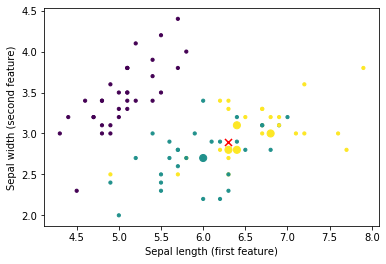

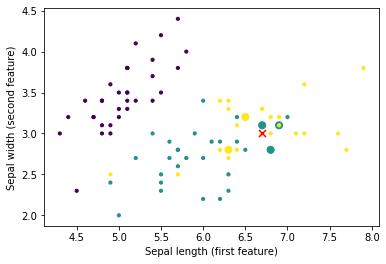

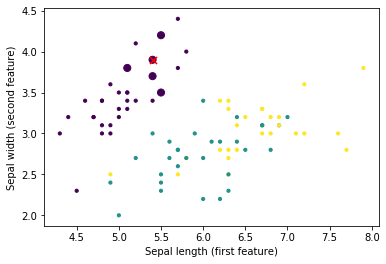

In [26]:
def plot_neighbours(X_train, y_train, test_instance, k):
    """
    Plots all points in the dataset and shows the neighbours of a given test point.
    """
    
    neighbours = get_neighbours(X_train, test_instance, k)
    # initialization of the sizes of the points to be plotted, size 10 
    neigh_sizes = np.ones((len(y_train), 1)) * 10
    neigh_sizes[neighbours] = 50
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=neigh_sizes)
    plt.scatter(test_instance[0], test_instance[1], c='r', s=50, marker='x')
    plt.show()

for i in range(3):
    test_instance = X_test[i]
    k = 5
    plt.xlabel('Sepal length (first feature)')
    plt.ylabel('Sepal width (second feature)')
    plot_neighbours(X_train, y_train, test_instance, k)

### 4. Majority vote

We have the $k$ nearest neighbours of the test set. Now we will choose a label by majority vote.

$\ex{4.1}$ Implement the `get_majority_vote` function.

In [49]:
from collections import Counter #to count unique occurances of items in array, for majority voting

def get_majority_vote(neighbours, training_labels):
    """
    Given an array of nearest neighbours indices for a given test case, 
    tally up their classes to vote on the correct class for the test instance.
    :param neighbours: list of nearest neighbour indices.
    :param training_labels: the list of labels for each training instance.
    :return: the label of most common class.
    """
    # STUDENT
    labels = []
    for i in neighbours:
        label = training_labels[i]
        labels.append(label)
    
    hehe = Counter(labels)
    result = hehe.most_common(1)
    fr = result[0][0]
    return fr


    
 
predicted_label = get_majority_vote(neighbours, y_train)
predicted_label

0

### 5. Accuracy

Now we will put all the code you wrote above together and try to summarise the accuracy of this method.

$\ex{5.1}$ Complete the `predict` function below and compute the accuracy on `X_test, y_test`.

In [50]:
def predict(X_train, X_test, y_train, y_test, k=5):
    """
    Predicts all labels for the test set, using k-nn on the training set and computes the accuracy.
    :param X_train: the training set features.
    :param X_test: the test set features.
    :param y_train: the training set labels.
    :param y_test: the test set labels.
    :return: list of predictions.
    """

    # generate predictions
    predictions = []
    
    # for each instance in the test set, get nearest neighbours and majority vote on predicted class
    # STUDENT
    for i, x in enumerate(X_test):
        neig = get_neighbours(X_train, x, k)
        he = get_majority_vote(neig, y_train)
        predictions.append(he)
        
    return predictions

# load the data and create the training and test sets
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)
k = 5

predictions = predict(X_train, X_test, y_train, y_test, k)

# summarize performance of the classification
accuracy = accuracy_score(y_test, predictions)
print('The overall accuracy of the model is: {:f}'.format(accuracy))

The overall accuracy of the model is: 0.933333


$\ex{5.2}$ Complete the `accuracy_score_self` and use this to compute your own accuracy.

In [53]:
def accuracy_score_self(y_test, y_pred):
    """
    Computes the accuracy of a test set as the fraction of items that was classified correctly.
    :param y_test: the list of true labels for the test set.
    :param y_pred: the list of predicted labels for the test set.
    :return: accuracy as a floating point.
    """
    
    # STUDENT
    m=0
    for i,s in enumerate(y_test):
        if (s == y_pred[i]):
            m+=1
    return m / len(y_test)
    

# summarize performance of the classification
accuracy_self = accuracy_score_self(y_test, predictions)

print('Accuracy using scikit-learn: ', accuracy)
print('Accuracy using own accuracy: ', accuracy_self)

Accuracy using scikit-learn:  0.9333333333333333
Accuracy using own accuracy:  0.9333333333333333


$\ex{5.3}$ Complete the `plot_errors` function to get a better understanding of why some points are misclassified. You can use the `plot_neighbours` function.

In [55]:
def plot_errors(X_train, X_test, y_train, y_test, predictions, k):
    """
    Plots the test points that were misclassified and their nearest neighbours using plot_neighbours.
    """
    
    # STUDENT
    
    
plot_errors(X_train, X_test, y_train, y_test, predictions, k)

TypeError: plot_neighbours() takes 4 positional arguments but 6 were given

$\ex{5.4}$ Test out several values of $k$ to find the best $k$. Automate this process, e.g. for $k = 1...10$ compute the average accuracy over 10 repetitions (to average over randomness in train/test splits; i.e. [cross validation](https://machinelearningmastery.com/k-fold-cross-validation/)) and plot the accuracy for each $k$.

__Hint__ You can store all the results in a `[10 x n_iterations]` numpy array and `np.mean` with `axis=1` to compute the mean accross the number of iterations.

Text(0, 0.5, 'Accuracy')

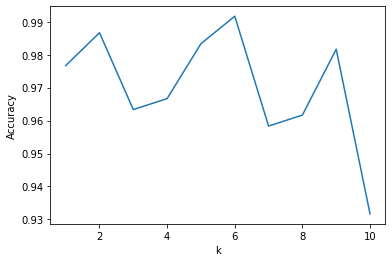

In [58]:
n_iterations = 10
accuracies =[]

for i in range(n_iterations):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)
    accuracy =[]
    for k in range(1, 11):  
        predictions = predict(X_train, X_test, y_train, y_test, k)
        accuracy.append(accuracy_score(y_test, predictions))
    accuracies.append(accuracy)
accuracies = np.mean(np.array(accuracies), axis=1)

plt.plot(range(1, 11), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')

$\q{5.2}$ What $k$ would you pick, based on your results? Does it matter a lot?

Now that we are plotting to learn about our classifier, let's take a brief look at learning curves. For a learning curve, we plot the number of samples (x-axis) in the train set against the accuracy (y-axis).

$\q{5.3}$ What would you expect the learning curve to look like for the k-NN classifier?

Let's go ahead and create a learning curve.

$\ex{5.5}$ Read through the code to understand what is happening and execute to plot the learning curve. Try this for several values for $k$.

Text(0, 0.5, 'Accuracy')

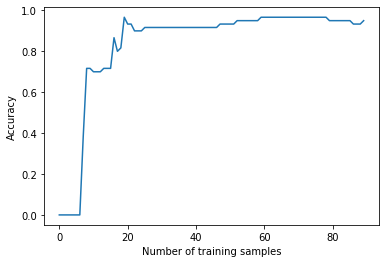

In [59]:
k = 7

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)
# Set up array to store accuracies
accuracies = np.zeros(X_train.shape[0])

# We want to learn with at least k samples and up to the size of the train set
for i in range(k, X_train.shape[0]):
    predictions = predict(X_train[:i], X_test, y_train[:i], y_test, k)
    accuracies[i] = accuracy_score_self(y_test, predictions)
    
# Plot learning curve
plt.plot(range(X_train.shape[0]), accuracies)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')

$\q{5.4}$ Did the learning curve resemble the expected curve? If not: why?